<a href="https://colab.research.google.com/github/tas-anne/Digital-SIgnal-Processing-LabTask/blob/main/190041220_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Tasfia Tasneem Annesha
##ID: 190041220

#Moving Average Filter (MAF)

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

1. Write a function y = maf(x,M) which will take an input signal x and filter the signal using a M
point moving average filter.

a. Generate a signal, add some random noise (it is better if your signal looks something like
the one in Figure 15-1.a) and then test your function maf() to demonstrate the noise
reduction capability of the filter for various values of M.

**Generate a signal, add some random noise**

In [ ]:
noise = np.random.normal(0, 1, 500)
sin_signal = np.sin(np.linspace(0, 2*math.pi, 500))
x = sin_signal + noise 

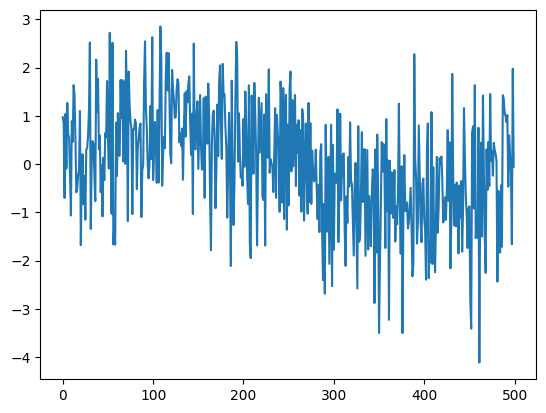

In [ ]:
plt.plot(x)

In [ ]:
def maf(x, M):
    y = np.zeros(x.shape)
    low = math.floor(M/2)    
    s = np.sum(x[:M])
    y[low] = s/M
    
    for i in range(low+1, x.shape[0]-low):
        s = s + x[i + low] - x[i - (low + 1)]
        y[i] = s / M
    
    return y

In [ ]:
y = maf(x, 5)


**the noise reduction capability of the filter for various values of M**

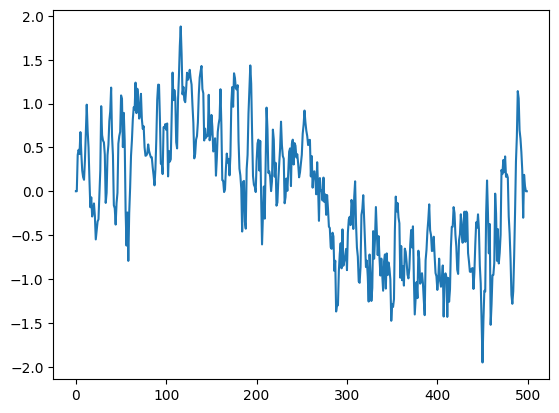

In [ ]:
plt.plot(y)

b. Explain the plots as you increase the value of M. In practice, try to verify the characteristics
shown in Figure 15-1.b and 15.1.c

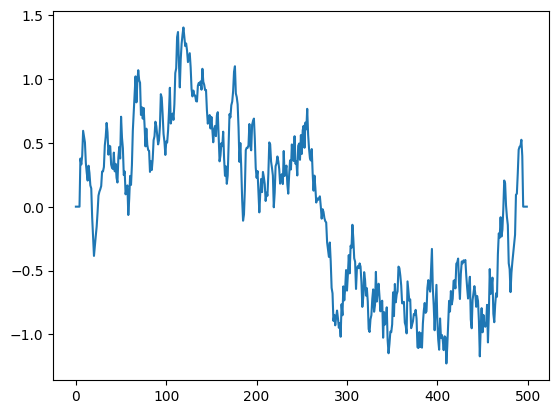

In [ ]:
y1 = maf(x, 11)
plt.plot(y1)

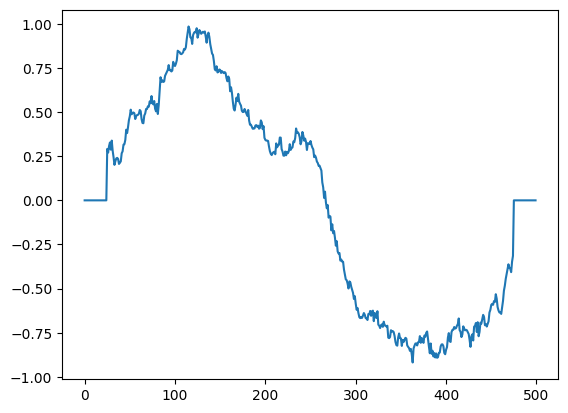

In [ ]:
y2 = maf(x, 51)
plt.plot(y2)

2. Using equation 15-2, generate the frequency response of a moving average filter (for 3-point, 11-
point and 31-point) and plot them in a single figure, to verify Figure 15-2.

In [ ]:
def freq_response(M):
    t = np.linspace(0, 0.5, 100)
    H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))
    H[H<0] = -H[H<0]
    return H, t

<ipython-input-9-69c311bbda36>:3: RuntimeWarning: invalid value encountered in true_divide
  H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))


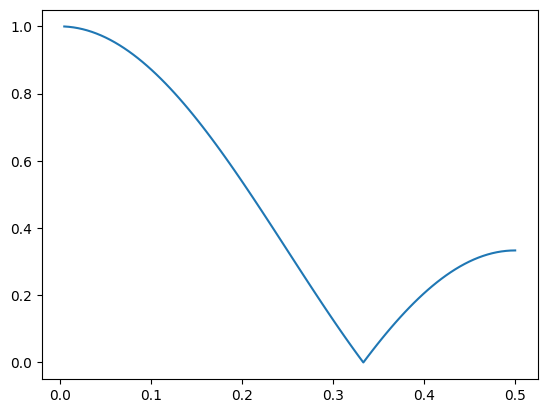

In [ ]:
H, t = freq_response(3)
plt.plot(t, H)

<ipython-input-9-69c311bbda36>:3: RuntimeWarning: invalid value encountered in true_divide
  H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))


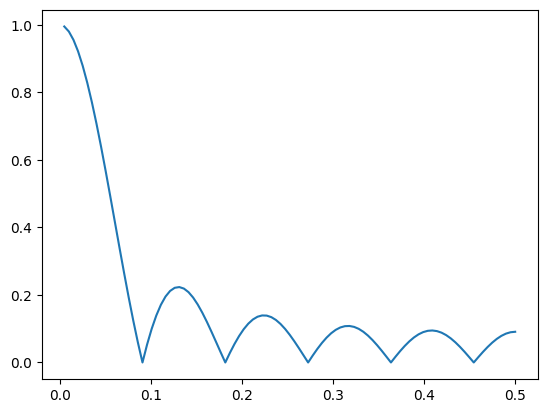

In [ ]:
H, t = freq_response(11)
plt.plot(t, H)

<ipython-input-9-69c311bbda36>:3: RuntimeWarning: invalid value encountered in true_divide
  H = np.sin(math.pi * t * M)/(M * np.sin(math.pi * t))


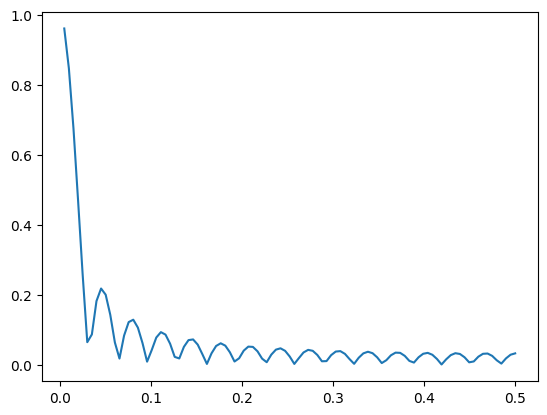

In [ ]:
H, t = freq_response(31)
plt.plot(t, H)

3. Verify Figure 15-3 using a 4x4 subplot. Choose a suitable MAF kernel, use convolution to generate 2
pass and 4 pass kernels. Generate the step response and the Frequency response in dB.

In [ ]:
onep = maf(x, 51)
twop = maf(onep, 51)
threep = maf(twop, 51)
fourp = maf(threep, 51)

In [ ]:
onep_fr = np.sqrt(np.fft.rfft(onep).real ** 2 + np.fft.rfft(onep).imag ** 2)
twop_fr = np.sqrt(np.fft.rfft(twop).real ** 2 + np.fft.rfft(twop).imag ** 2)
fourp_fr = np.sqrt(np.fft.rfft(fourp).real ** 2 + np.fft.rfft(fourp).imag ** 2)

In [ ]:
onep_sr = np.cumsum(onep) 
twop_sr = np.cumsum(twop)
fourp_sr = np.cumsum(fourp)

In [ ]:
onep_frdb = 20 * np.log(onep_fr)
twop_frdb = 20 * np.log(twop_fr)
fourp_frdb = 20 * np.log(fourp_fr)

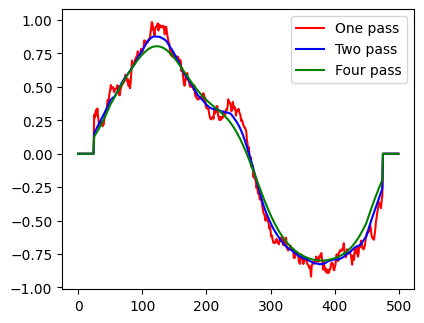

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(onep, 'r', label="One pass")
plt.plot(twop, 'b', label="Two pass")
plt.plot(fourp, 'g', label="Four pass")
plt.legend()



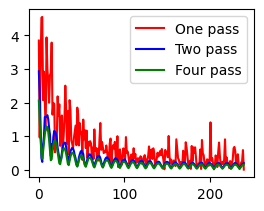

In [ ]:
plt.subplot(2, 2, 2)
plt.plot(onep_fr[10:], 'r', label="One pass")
plt.plot(twop_fr[10:], 'b', label="Two pass")
plt.plot(fourp_fr[10:], 'g', label="Four pass")
plt.legend()



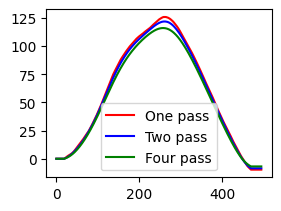

In [ ]:
plt.subplot(2, 2, 3)
plt.plot(onep_sr[5:], 'r', label="One pass")
plt.plot(twop_sr[5:], 'b', label="Two pass")
plt.plot(fourp_sr[5:], 'g', label="Four pass")
plt.legend()



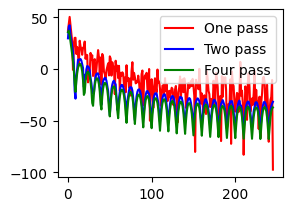

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(onep_frdb[5:], 'r', label="One pass")
plt.plot(twop_frdb[5:], 'b', label="Two pass")
plt.plot(fourp_frdb[5:], 'g', label="Four pass")
plt.legend()

4. Now, write an algorithm that can execute a moving average filter in linear time or O(n). See chapter
15 for hints.

In [29]:
def maf2(x, M):
  l=x.shape
  y = np.zeros(l)
  low = M//2    
  s = 0
  for i in range(M):
    s += x[i]
  y[low] = s/M
  
  for i in range(low+1, x.shape[0]-low):
      s = s + x[i + low] - x[i - (low + 1)]
      y[i] = s / M
  
  return y

#Windowed-Sinc Filter

5. Take hundred points from -50 to 50 using the linspace() [or any equivalent function]. Plot the sinc
function for these values.

In [ ]:
def sinc(fc):
    t = np.linspace(-50, 50, 100)
    H = np.sin(2 * math.pi * fc * t)/(t * math.pi)
    return H, t

In [ ]:
H, t = sinc(0.5)

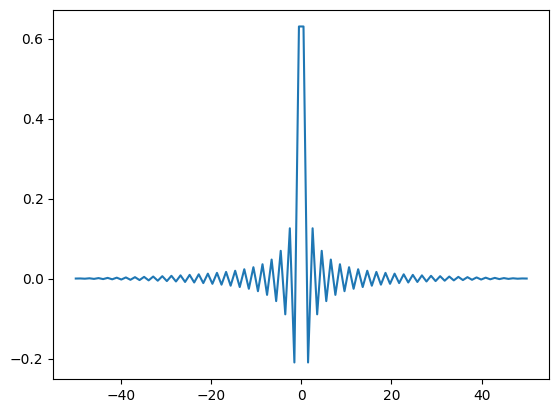

In [ ]:
plt.plot(t,H)

6. Take the sinc function described above. Generate and plot the corresponding frequency response.
Now truncate the sinc function to a suitable length (M) and watch the change in frequency
response. Smooth the truncated sinc function with Blackman/Hamming window and investigate the
frequency response.

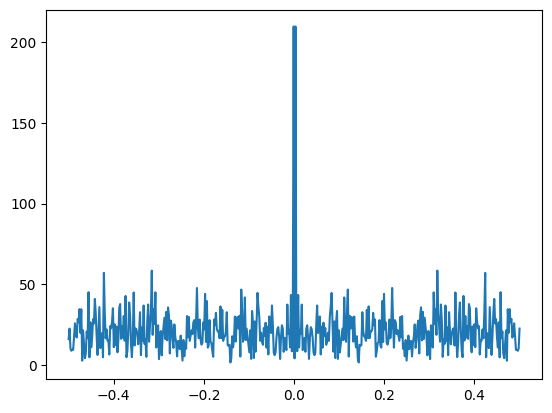

In [34]:
fft = np.fft.fft(x)
magX = abs(np.fft.fftshift(fft))

plt.plot(np.linspace(-.5, 0.5, len(magX)), magX)
plt.show()

7. Verify the characteristics of Blackman and Hamming window as stated in the textbook. Use
numpy.blackman and numpy.hamming.

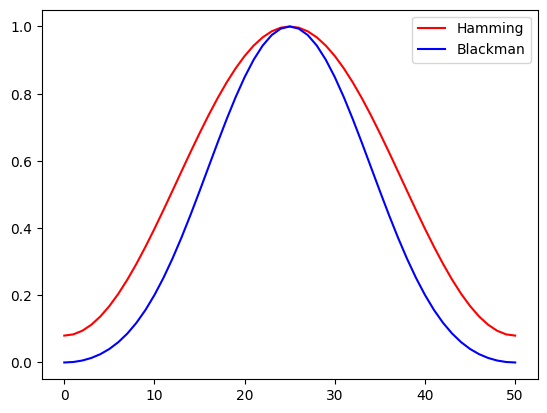

In [ ]:
plt.plot(np.hamming(51), 'r', label="Hamming")
plt.plot(np.blackman(51), 'b', label="Blackman")
plt.legend()
plt.show()

8. Verify the characteristics of Blackman and Hamming window as stated in the textbook without using
numpy.blackman and numpy.hamming. Use the equations of hamming and blackman window as
shown in chapter 16.

In [ ]:
def blackman_window(n):
  
    a0 = 0.42
    a1 = 0.5
    a2 = 0.08
    pi = np.pi
    n_values = np.arange(n)
    w = a0 - a1*np.cos(2*pi*n_values/(n-1)) + a2*np.cos(4*pi*n_values/(n-1))
    return w

In [ ]:
def hamming_window(n):
    """
    Compute the Hamming window of length n.
    """
    alpha = 0.54
    beta = 1 - alpha
    pi = np.pi
    n_values = np.arange(n)
    w = alpha - beta * np.cos(2 * pi * n_values / (n - 1))
    return w

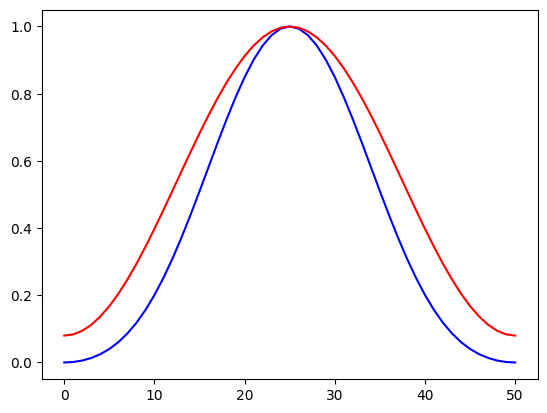

In [ ]:
plt.plot(blackman_window(51), 'b', label="Blackman_Window")
plt.plot(hamming_window(51), 'r', label="Hamming_Window")